# CSMODEL Project: AI Copilot in Education Analysis
Group 5

## 1. Introduction

This dataset was made by Emille Villacerat and Celbert Himang as part of their paper “Data on behavioural intention to use AI copilot through TAM and AI ecological education policy lens” last May 13, 2025. According to the paper, the study introduces a dataset examining the behavioral intention of the faculty and students of Cebu Technological University to adopt AI Copilot. The analysis is grounded in the Technology Acceptance Model (TAM) and the AI Ecological Education Policy Framework. Data was gathered through a quantitative survey, administered digitally to a diverse group of participants, including professors and students from different academic departments and year levels.

The researchers gathered the data through an online, five point Likert Scale survey to assess the perceptions of AI Copilot adoption amongst respondents of Cebu Technological University. The questions used in the survey were derived from existing literature on technology acceptance and educational frameworks.

Each row in the dataset corresponds to one respondent. 414 responses were gathered, however only 396 were deemed valid responses due to low variability of answers from 18 respondents. The whole survey, ranging from demographics, to likert scale questions, totals to 45 variables.

In [161]:
# 1. Clone github repository for the data
!git clone https://github.com/CyAdrienneRamos/csmodel-mco.git

fatal: destination path 'csmodel-mco' already exists and is not an empty directory.


In [162]:
# 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [163]:
# 3. Load the Dataset
file_path_raw = '/content/csmodel-mco/dataset/survey_data_raw.xls'
df = pd.read_excel(file_path_raw, nrows=414)

## 2. Data Preprocessing

#### We first check if the data is properly imported.

In [164]:
# Check if the data is properly imported
df.head()

,TimeStamp(OnOpenForm),Timestamp(OnClickSubmit),Duration(in Minutes),"I am aware of the purpose of this survey questionnaire on AI Copilot in Education: A Study on Usage and Acceptance through TAM and AI Ecological Policy Lens. The survey is designed to understand my experiences, perceptions, and attitudes toward using AI",Age:,Sex:,Highest Educational Attainment,Type of respondent,College:,"If student, specify year level",...,PEOU2:My interaction with AI Copilot does not require much mental effort.,PEOU3: It is easy to become skillful using AI Copilot,PEOU4: I found AI Copilot easy to use.,PEOU5: It would be easy for me to find information using AI Copilot.,ITU1: I intend to use AI Copilot to a greater extent.,ITU2: I think doing my schoolwork using AI Copilot is interesting.,ITU3: I believe that AI Copilot is a valuable tool for doing my schoolwork.,ITU4: I will recommend AI Copilot to another schoolmate or colleague.,ITU5: I believe that AI Copilot has given me a unique experience.,Please check the box(es) corresponding to the barriers and challenges that may be encountered in the continuous usage of AI Copilot
0,2024-10-17 21:24:58.000,2024-10-17 21:36:58.000,12,I consent voluntarily to participate in this s...,21,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,4,4,5,5,4,4,5,4,4,AI Copilot ethical dilemma
1,2024-10-17 21:17:47.246,2024-10-17 21:28:47.246,11,I consent voluntarily to participate in this s...,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,5,5,5,4,3,5,5,5,5,"AI Copilot ethical dilemma, Inflexible teachin..."
2,2024-10-17 21:20:07.997,2024-10-17 21:34:07.997,14,I consent voluntarily to participate in this s...,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,3,2,3,5,4,4,3,3,4,AI Copilot ethical dilemma
3,2024-10-17 21:20:13.838,2024-10-17 21:35:13.838,15,I consent voluntarily to participate in this s...,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,4,4,4,4,4,3,3,3,3,"AI Copilot privacy concern, Insufficient budge..."
4,2024-10-17 21:20:52.396,2024-10-17 21:33:52.396,13,I consent voluntarily to participate in this s...,19,Female,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,4,4,4,4,4,4,4,4,4,Insufficient budget for the adoption of AI Cop...


In [165]:
# Check if the data is properly imported
df.tail()

,TimeStamp(OnOpenForm),Timestamp(OnClickSubmit),Duration(in Minutes),"I am aware of the purpose of this survey questionnaire on AI Copilot in Education: A Study on Usage and Acceptance through TAM and AI Ecological Policy Lens. The survey is designed to understand my experiences, perceptions, and attitudes toward using AI",Age:,Sex:,Highest Educational Attainment,Type of respondent,College:,"If student, specify year level",...,PEOU2:My interaction with AI Copilot does not require much mental effort.,PEOU3: It is easy to become skillful using AI Copilot,PEOU4: I found AI Copilot easy to use.,PEOU5: It would be easy for me to find information using AI Copilot.,ITU1: I intend to use AI Copilot to a greater extent.,ITU2: I think doing my schoolwork using AI Copilot is interesting.,ITU3: I believe that AI Copilot is a valuable tool for doing my schoolwork.,ITU4: I will recommend AI Copilot to another schoolmate or colleague.,ITU5: I believe that AI Copilot has given me a unique experience.,Please check the box(es) corresponding to the barriers and challenges that may be encountered in the continuous usage of AI Copilot
409,2024-10-28 00:48:18.390,2024-10-28 00:59:18.390,11,I consent voluntarily to participate in this s...,20,Female,College Level,Student,College of Education,Third Year,...,3,3,3,5,4,3,2,2,5,"AI Copilot ethical dilemma, AI Copilot gives i..."
410,2024-10-28 00:49:32.232,2024-10-28 01:02:32.232,13,I consent voluntarily to participate in this s...,19,Female,College Level,Student,"College of Computer, Information and Communica...",First Year,...,3,3,3,4,3,4,4,3,3,Lack of teacher confidence and digital competence
411,2024-10-28 12:41:05.672,2024-10-28 12:50:05.672,9,I consent voluntarily to participate in this s...,19,Female,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,2,2,4,4,4,4,2,4,4,"AI Copilot ethical dilemma, AI Copilot privacy..."
412,2024-10-28 14:36:35.273,2024-10-28 14:50:35.273,14,I consent voluntarily to participate in this s...,19,Female,College Level,Student,College of Management and Entrepreneurship,Second Year,...,3,3,3,3,3,3,3,4,4,"AI Copilot ethical dilemma, AI Copilot privacy..."
413,2024-10-28 19:15:49.326,2024-10-28 19:29:49.326,14,I consent voluntarily to participate in this s...,19,Female,College Level,Student,College of Management and Entrepreneurship,Second Year,...,3,3,4,4,3,4,5,5,5,"AI Copilot privacy concern, AI Copilot gives i..."


Looking at the df.info(), we can see that we have some null values. The column namings are also very messy. Some column data types also defaulted to objects. We will be dealing with these in the following sections.

In [166]:
# Look at the data structure of the dataframe
# Here we see the columns, number of rows, data types, and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 49 columns):
 #   Column                                                                                                                                                                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                                           --------------  -----         
 0   TimeStamp(OnOpenForm)                                                                                                                                                                                                                                            414 non-null    datetime64[ns]
 1   Timestamp(O

We first start with removing unnecessary columns.

In [167]:
# We will not be using the timestamps and consent
df = df.drop(columns=df.columns[[0,1,3]])

We then clean up the remaining column names by replacing them with their question code from the survey and simplifying some.

In [168]:
# First take the column labels
columns = list(df.columns)
# Extract the question codes
columns_split = [list(map(str.strip, x.split(':'))) for x in columns]
# Simplify some column names
columns_keys_map = {
    'Duration(in Minutes)' : 'Duration',
    'Highest  Educational Attainment':'Education',
    'Type of respondent':'Respondent',
    'If student, specify year level':'YearLevel',
    'Years of AI usage':'UsageYears',
    'Please check the box(es) corresponding to the barriers and challenges that may be encountered in the continuous usage of AI Copilot':'Barriers'
}
# Apply the change map
columns = [columns_keys_map.get(x[0], x[0]) for x in columns_split]
# Update the column labels
df.columns = columns

#Add this to store the descriptions
#columns_split_mapped = [[columns_keys_map.get(x[0], x[0]), (x[0] if x[0] in columns_keys_map.keys() else x[1])] for x in columns_split]
#df.columns = columns_desc.keys()
#columns_desc = {x[0]:(x[1].strip() if x[1]!='' else x[0]) for x in columns_split_mapped}
#columns_desc
df.head()

,Duration,Age,Sex,Education,Respondent,College,YearLevel,UsageYears,RAE1,RAE2,...,PEOU2,PEOU3,PEOU4,PEOU5,ITU1,ITU2,ITU3,ITU4,ITU5,Barriers
0,12,21,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,5,5,...,4,4,5,5,4,4,5,4,4,AI Copilot ethical dilemma
1,11,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,5,3,...,5,5,5,4,3,5,5,5,5,"AI Copilot ethical dilemma, Inflexible teachin..."
2,14,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,5,5,...,3,2,3,5,4,4,3,3,4,AI Copilot ethical dilemma
3,15,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,4,4,...,4,4,4,4,4,3,3,3,3,"AI Copilot privacy concern, Insufficient budge..."
4,13,19,Female,College Level,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,4,5,...,4,4,4,4,4,4,4,4,4,Insufficient budget for the adoption of AI Cop...


### Data Cleaning - Respondent Information

#### Age

There are no problems with the Age column.

In [169]:
# No problems with the values
df['Age'].describe()

,Age
count,414.000000
mean,20.712560
std,4.410749
min,18.000000
25%,19.000000
50%,20.000000
75%,21.000000
max,57.000000


#### Sex

We convert the data type to categorical.

In [170]:
# No problems with the unique values and counts
df['Sex'].value_counts(dropna=False)

,count
Sex,
Male,209
Female,205


In [171]:
# Convert to categorical
df['Sex'] = pd.Categorical(df['Sex'], categories=df['Sex'].unique())

#### Respondent

We convert the data type to categorical.

In [172]:
# No problems with the unique values and counts
df['Respondent'].value_counts(dropna=False)

,count
Respondent,
Student,390
Teacher,24


In [173]:
# Convert to categorical
df['Respondent'] = pd.Categorical(df['Respondent'], categories=df['Respondent'].unique())

#### Usage Years

We convert the data type to categorical.

In [174]:
# No problems with the unique values and counts
df['UsageYears'].value_counts(dropna=False)

,count
UsageYears,
1 - 2 years,195
0 - 1 year,142
3 - 4 years,49
beyond 4 years,28


In [175]:
# Convert to categorical
df['UsageYears'] = pd.Categorical(df['UsageYears'], categories=df['UsageYears'].unique())

#### College

We remove respondents from colleges not under Cebu Technological University.

In [176]:
# Checking the unique values, we can see that there are multiple universities
# with relatively very low counts. These are colleges outside CTU.
df['College'].value_counts(dropna=False)

,count
College,
"College of Computer, Information and Communications Technology",143
College of Technology,76
College of Education,70
College of Engineering,48
College of Management and Entrepreneurship,36
College of Arts and Sciences,35
College of Nursing,3
College of Hospitality and tourism management,1
College of Customs,1


In [177]:
# Identify colleges to remove
colleges_to_remove = [
    'College of Nursing',
    'College of Hospitality and tourism management ',
    'College of Customs',
    'College of Medical Technology ',
]
# Remove the colleges
df = df[~df['College'].isin(colleges_to_remove)]
df['College'].value_counts()

,count
College,
"College of Computer, Information and Communications Technology",143
College of Technology,76
College of Education,70
College of Engineering,48
College of Management and Entrepreneurship,36
College of Arts and Sciences,35


We convert the data type to categorical.

In [178]:
df['College'] = pd.Categorical(df['College'], categories=df['College'].unique())

#### Year Level

We first deal with the missing values.

In [179]:
df['YearLevel'].value_counts(dropna=False)

,count
YearLevel,
Second Year,200
First Year,97
Third Year,56
Fourth Year,28
NaN,27


In [180]:
# If the respodent is a teacher, then it would make sense for the YearLevel to
# be missing
df[df['YearLevel'].isna()]['Respondent'].value_counts()

,count
Respondent,
Teacher,23
Student,4


In [181]:
# We found 4 students with missing YearLevel
df[(df['YearLevel'].isna()) & (df['Respondent'] == 'Student')]
# We will be dropping their corresponding rows
df = df[~((df['YearLevel'].isna()) & (df['Respondent'] == 'Student'))]
# We will be using the value "Teaching" for the teachers
df['YearLevel'] = df['YearLevel'].fillna('Teaching')
df['YearLevel'].value_counts(dropna=False)

,count
YearLevel,
Second Year,200
First Year,97
Third Year,56
Fourth Year,28
Teaching,23


We convert the data type to categorical.

In [182]:
df['YearLevel'] = pd.Categorical(df['YearLevel'], categories=df['YearLevel'].unique())

#### Education

We will be dropping this column as the student respondents are all college students. Although the teachers have a higher variation, there are some under the vague "College Level" category.

In [183]:
df.groupby('Respondent', observed=False)['Education'].value_counts()

Respondent  Education                            
Student     College Level                            369
            Bachelor's Degree                          8
            Currently A 2nd Year College Student       1
            Senior High School Graduate                1
            Still a college student                    1
            Doctorate Degree (PhD, EdD)                0
            Master's Degree                            0
            Professional Degree (JD, MD)               0
Teacher     Bachelor's Degree                          8
            Master's Degree                            8
            Doctorate Degree (PhD, EdD)                5
            College Level                              2
            Professional Degree (JD, MD)               1
            Currently A 2nd Year College Student       0
            Senior High School Graduate                0
            Still a college student                    0
Name: count, dtype: int64

In [184]:
# Drop the Education column
df = df.drop(['Education'], axis=1)
df = df.reset_index(drop=True)

### Data Cleaning - Questionnaire

The data types for the questionnaire are the following:

#### Barriers

The data for this column are all joined together using commas. We will be cleaning the data and separating it into the options as provided in the survey. Input given in the "Others" option will be ignored.

In [185]:
# Check the valued of the Barriers column
df['Barriers']

,Barriers
0,AI Copilot ethical dilemma
1,"AI Copilot ethical dilemma, Inflexible teachin..."
2,AI Copilot ethical dilemma
3,"AI Copilot privacy concern, Insufficient budge..."
4,Insufficient budget for the adoption of AI Cop...
...,...
399,"AI Copilot ethical dilemma, AI Copilot gives i..."
400,Lack of teacher confidence and digital competence
401,"AI Copilot ethical dilemma, AI Copilot privacy..."
402,"AI Copilot ethical dilemma, AI Copilot privacy..."


We temporarily deal with the row with a missing value.

In [186]:
# One respondent did not select any
df[df['Barriers'].isnull()]

,Duration,Age,Sex,Respondent,College,YearLevel,UsageYears,RAE1,RAE2,RAE3,...,PEOU2,PEOU3,PEOU4,PEOU5,ITU1,ITU2,ITU3,ITU4,ITU5,Barriers
285,10,18,Female,Student,College of Technology,First Year,beyond 4 years,3,3,2,...,4,4,4,4,4,5,5,4,4,NaN


In [187]:
# We will give it a placeholder value for now
df['Barriers'] = df['Barriers'].fillna('NA')

We then split up the options that the respondents selected.

In [188]:
# Provided options in the survey
barriers_provided = {
    'AI Copilot ethical dilemma':'BC1',
    'AI Copilot privacy concern':'BC2',
    'AI Copilot gives inappropriate or misaligned text suggestions':'BC3',
    'Inflexible teaching methods and curricula':'BC4',
    'Insufficient budget for the adoption of AI Copilot':'BC5',
    'Lack of AI literacy':'BC6',
    'Lack of cognitive scaffolding for students':'BC7',
    'Lack of teacher confidence and digital competence':'BC8',
    'Unequal access to AI Copilot':'BC9',
    'User resistance to AI Copilot adoption':'BC10',
    'NA':'NA'
}
# Get barriers as a list
barriers_list = list(df['Barriers'])
# Split individual options
# - The regex splits them by the commas, ignoring commas within sentences
# - The strip(', ') deals with blank input on "Others" option
barriers_split = [set(map(str.strip, re.split(r',\s+(?=[A-Z])', x.strip(', ')))) for x in barriers_list]
# Get all unique chosen options
barriers = set.union(*barriers_split)
# Other inputs
barriers_others = barriers.difference(set(barriers_provided.keys()))
barriers_others

{'Decline in the cognitive processing of students as they will become dependent on AI usage rather than actively creating, participating, and solving their own problems.',
 'Dependency and misuse of AI Copilot',
 "I don't have any experience yet using AI Copilot",
 'Lack of cognitive scaffolding for students, students might rely permanently on AI Copilot',
 "Like sometimes they don't give you accurate answers or the answers you've been looking for. Nothing beats experiences from teachers.",
 'Nahimong tapulan ang mga  people tungod naay AI',
 'No further knowledge about AI copilot',
 'Over-reliance and Skill Degradation',
 "Student won't be learning in the correct way, but some can still use AI for learning and self studying.",
 'Students might weaken their ability to think critically and logically'}

In [189]:
# Remove input for the "Others" option
barriers_clean = [row.difference(barriers_others) for row in barriers_split]
# Check the new unique chosen options
barriers = set.union(*barriers_clean)
barriers

{'AI Copilot ethical dilemma',
 'AI Copilot gives inappropriate or misaligned text suggestions',
 'AI Copilot privacy concern',
 'Inflexible teaching methods and curricula',
 'Insufficient budget for the adoption of AI Copilot',
 'Lack of AI literacy',
 'Lack of cognitive scaffolding for students',
 'Lack of teacher confidence and digital competence',
 'NA',
 'Unequal access to AI Copilot',
 'User resistance to AI Copilot adoption'}

In [190]:
# Convert to df with option codes as column names and 1 to indicate selection
barriers_df = pd.DataFrame([{barriers_provided[item]: 1 for item in row} for row in barriers_clean]).fillna(0).astype(int)
# Rearrange the columns, remove the placeholder NA
barriers_df = barriers_df[['BC1', 'BC2', 'BC3', 'BC4', 'BC5', 'BC6', 'BC7', 'BC8', 'BC9', 'BC10']]
barriers_df

,BC1,BC2,BC3,BC4,BC5,BC6,BC7,BC8,BC9,BC10
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
399,1,0,1,0,0,0,1,1,0,0
400,0,0,0,0,0,0,0,1,0,0
401,1,1,1,0,0,0,1,0,1,1
402,1,1,0,0,0,0,1,0,1,1


In [191]:
# Replace the Barriers column with the cleaner Barrier columns
df = df.drop(['Barriers'], axis=1)
df = pd.concat([df, barriers_df], axis=1)

#### Questions

The study based on this dataset mentions that some responses were ommited due to having minimal variability; though it does not elaborate on this claim. We will go over the authenticity of the ratings of all questions, and determine which responses to drop.

In [192]:
# Create an instance of the main dataset, only containing columns of the questions
ques_df = df

# Get a list of the question codes
questions = ques_df.columns
questions

Index(['Duration', 'Age', 'Sex', 'Respondent', 'College', 'YearLevel',
       'UsageYears', 'RAE1', 'RAE2', 'RAE3', 'RAE4', 'RAE5', 'RAE6', 'GS1',
       'GS2', 'GS3', 'GS4', 'GS5', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'BA1',
       'BA2', 'BA3', 'BA4', 'BA5', 'PU1', 'PU2', 'PU3', 'PU4', 'PU5', 'PU6',
       'PEOU1', 'PEOU2', 'PEOU3', 'PEOU4', 'PEOU5', 'ITU1', 'ITU2', 'ITU3',
       'ITU4', 'ITU5', 'BC1', 'BC2', 'BC3', 'BC4', 'BC5', 'BC6', 'BC7', 'BC8',
       'BC9', 'BC10'],
      dtype='object')

From the `questions` list (and the survey questionare document on the dataset's website), the 6th question in group RAE and PU are **sincerity questions**. This question is the *complete opposite* of the 1st question asked in each group. Thus, to determine which responses to drop, the sum of each groups' 1st and 6th question will be calculated per response. If the sum if equal to 10, then the response is deemed inauthentic (answered the same rating for two contrasting questions) and will be dropped.

In [193]:
# Create a new column that shows the sum per response
ques_df['RAE_var'] = ques_df['RAE1'] + ques_df['RAE6']
ques_df['PU_var'] = ques_df['PU1'] + ques_df['PU6']

# Gather all responses that are inauthentic
ques_df = ques_df[(ques_df['RAE_var'] == 10) | (ques_df['PU_var'] == 10)]

# Display the relevant question ratings and variability
cols = ['Respondent','RAE1', 'RAE6', 'PU1', 'PU6', 'RAE_var', 'PU_var']
disp = ques_df[cols]
disp

,Respondent,RAE1,RAE6,PU1,PU6,RAE_var,PU_var
0,Student,5,5,4,2,10,6
8,Student,5,5,5,1,10,6
19,Student,3,5,5,5,8,10
21,Student,4,5,5,5,9,10
23,Student,5,5,5,2,10,7
27,Student,5,5,5,1,10,6
47,Student,5,4,5,5,9,10
48,Student,5,5,5,2,10,7
62,Student,4,4,5,5,8,10
65,Student,5,5,4,1,10,5


Taking the number of inauthentic responses, we get 54.

In [194]:
len(disp)

54

This portion of inauthentic responses is also reflected when plotting the standard deviation of the total ratings for all questions, per response.

<Axes: ylabel='Count'>

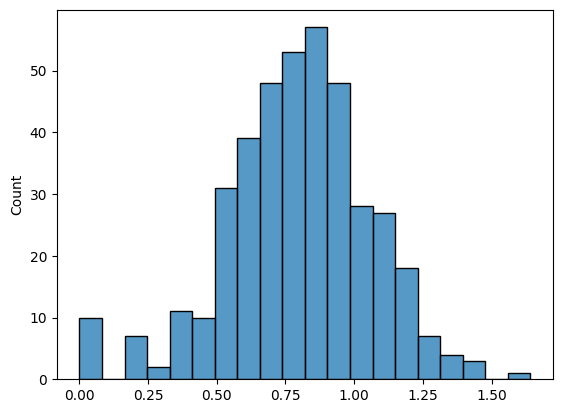

In [195]:
# Obtaining the standard deviation from the original dataset
std = df.loc[:, 'RAE1':'ITU5'].std(axis=1)
#Plotting on a simple historgram
sns.histplot(std)

All of these will be dropped from the main dataset. However, this subset will be preserved for possible future use.

In [196]:
# Obtain the indices of all responses to drop
inauthentic = ques_df.index
inauthentic

Index([  0,   8,  19,  21,  23,  27,  47,  48,  62,  65,  67,  72,  73,  85,
        91,  97, 111, 116, 120, 125, 142, 146, 149, 156, 164, 170, 172, 187,
       202, 207, 214, 215, 230, 234, 235, 250, 252, 282, 295, 301, 315, 317,
       329, 336, 338, 347, 352, 356, 358, 365, 369, 372, 383, 384],
      dtype='int64')

In [197]:
# Drop the responses from main dataset
df_clean = df.drop(df.index[list(inauthentic)])
df_clean = df_clean.reset_index(drop=True)

# Preserve the inauthentic responses into its own dataset
df_inauth = df.iloc[list(inauthentic)]
df_inauth = df_inauth.reset_index(drop=True)

Thus, the following datasets were obtained from data cleaning:

In [198]:
# Cleaned dataset, with inauthentic responses
df.head(5)

,Duration,Age,Sex,Respondent,College,YearLevel,UsageYears,RAE1,RAE2,RAE3,...,BC3,BC4,BC5,BC6,BC7,BC8,BC9,BC10,RAE_var,PU_var
0,12,21,Male,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,5,5,4,...,0,0,0,0,0,0,0,0,10,6
1,11,19,Male,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,5,3,3,...,0,1,0,1,0,0,0,1,8,4
2,14,19,Male,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,5,5,4,...,0,0,0,0,0,0,0,0,9,7
3,15,19,Male,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,4,4,3,...,0,0,1,0,0,0,1,0,7,5
4,13,19,Female,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,4,5,2,...,0,0,1,1,1,0,0,0,7,5


In [199]:
# Cleaned dataset, without inauthentic responses
df_clean.head(5)

,Duration,Age,Sex,Respondent,College,YearLevel,UsageYears,RAE1,RAE2,RAE3,...,BC3,BC4,BC5,BC6,BC7,BC8,BC9,BC10,RAE_var,PU_var
0,11,19,Male,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,5,3,3,...,0,1,0,1,0,0,0,1,8,4
1,14,19,Male,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,5,5,4,...,0,0,0,0,0,0,0,0,9,7
2,15,19,Male,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,4,4,3,...,0,0,1,0,0,0,1,0,7,5
3,13,19,Female,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,4,5,2,...,0,0,1,1,1,0,0,0,7,5
4,9,20,Male,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,4,4,5,...,0,1,1,0,0,0,0,1,6,7


In [200]:
# Inauthentic responses
df_inauth.head(5)

,Duration,Age,Sex,Respondent,College,YearLevel,UsageYears,RAE1,RAE2,RAE3,...,BC3,BC4,BC5,BC6,BC7,BC8,BC9,BC10,RAE_var,PU_var
0,12,21,Male,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,5,5,4,...,0,0,0,0,0,0,0,0,10,6
1,12,20,Male,Student,"College of Computer, Information and Communica...",Second Year,3 - 4 years,5,5,5,...,1,1,1,1,1,1,1,1,10,6
2,11,19,Female,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,3,5,4,...,1,0,0,1,1,0,1,0,8,10
3,14,20,Male,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,4,5,5,...,1,0,0,0,0,0,0,0,9,10
4,15,19,Male,Student,"College of Computer, Information and Communica...",Second Year,3 - 4 years,5,5,4,...,1,0,1,1,0,0,1,0,10,7
